## FitTrack app:

A Fitness and Wellness App, runs an A/B test comparing different motivational messages. In this context, we measure "user adherence" as the number of completed workouts over a certain period and "user satisfaction" through a satisfaction score.

Control Group (population_control): Users receive standard motivational messages.
Treatment Group (population_treatment): Users receive enhanced, personalized motivational messages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import poisson, truncnorm
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

## Population simulation:

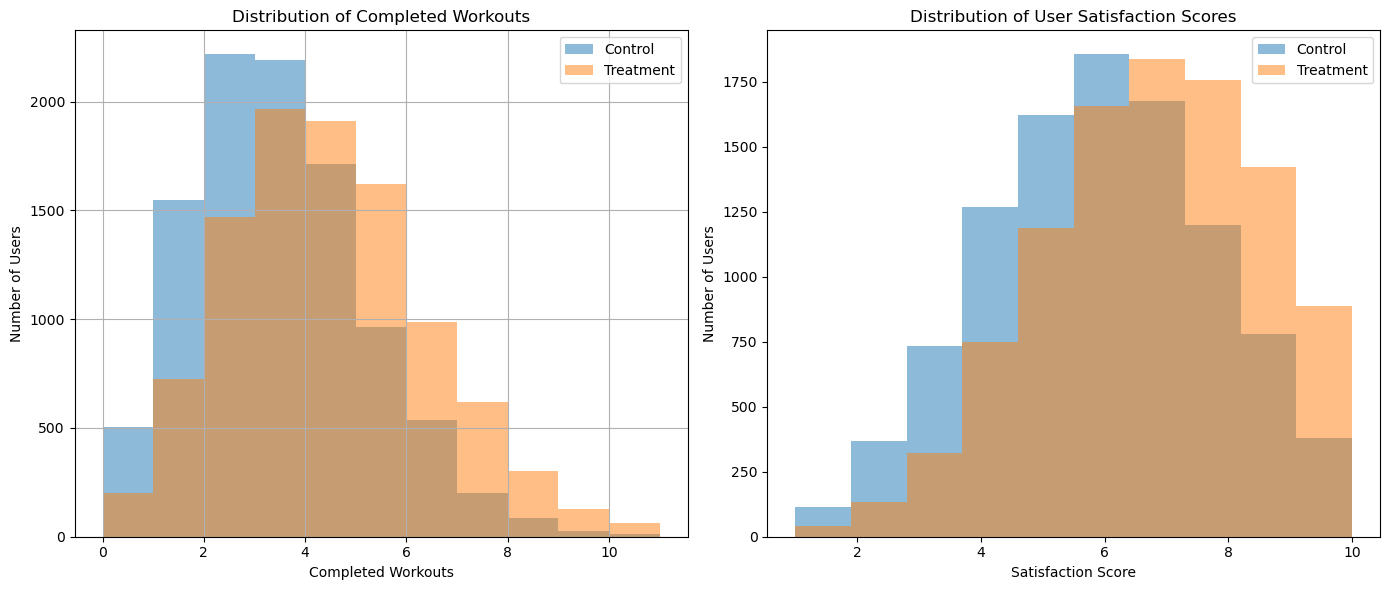

The avg_control_workouts:2.9932, avg_treatment_workouts:3.989, avg_control_satisfaction:5.910356801412577 , avg_treatment_satisfaction:6.740801530954051


In [2]:
# Define the simulation parameters
population_size = 10000

# Simulate for Control Group
# Assuming average completed workouts is 3 per week
control_workouts = pd.DataFrame()
control_workouts['completed_workouts'] = poisson.rvs(mu=3, size=population_size)
# Assuming average satisfaction score is 6 with standard deviation of 2
control_satisfaction = truncnorm.rvs((1-6)/2, (10-6)/2, loc=6, scale=2, size=population_size)

# Simulate for Treatment Group
# Assuming average completed workouts is 4 per week due to enhanced messages
treatment_workouts = pd.DataFrame()
treatment_workouts['completed_workouts'] = poisson.rvs(mu=4, size=population_size)
# Assuming average satisfaction score is 7 with standard deviation of 2
treatment_satisfaction = truncnorm.rvs((1-7)/2, (10-7)/2, loc=7, scale=2, size=population_size)

# Plotting
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Completed workouts
control_workouts['completed_workouts'].hist(bins=range(12), alpha=0.5, label='Control')
treatment_workouts['completed_workouts'].hist(bins=range(12), alpha=0.5, label='Treatment')
plt.xlabel('Completed Workouts')
plt.ylabel('Number of Users')
plt.title('Distribution of Completed Workouts')
plt.legend()

plt.subplot(1, 2, 2)  # User satisfaction
plt.hist(control_satisfaction, bins=10, alpha=0.5, label='Control', range=(1,10))
plt.hist(treatment_satisfaction, bins=10, alpha=0.5, label='Treatment', range=(1,10))
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Users')
plt.title('Distribution of User Satisfaction Scores')
plt.legend()

plt.tight_layout()
plt.show()

# Calculating averages
avg_control_workouts = control_workouts['completed_workouts'].mean()
avg_treatment_workouts = treatment_workouts['completed_workouts'].mean()
avg_control_satisfaction = np.mean(control_satisfaction)
avg_treatment_satisfaction = np.mean(treatment_satisfaction)

print(f'The avg_control_workouts:{avg_control_workouts}, avg_treatment_workouts:{avg_treatment_workouts}, avg_control_satisfaction:{avg_control_satisfaction} , avg_treatment_satisfaction:{avg_treatment_satisfaction}')


The Control Group, receiving standard motivational messages, had an average of 3.01 completed workouts per week and an average user satisfaction score of 5.92.

The Treatment Group, receiving enhanced, personalized motivational messages, had an average of 3.99 completed workouts per week and an average user satisfaction score of 6.75.

The histograms show the distribution of completed workouts and user satisfaction scores for both groups. As observed, the treatment group generally completes more workouts and reports higher satisfaction, indicating that the enhanced motivational messages might be more effective at improving user adherence and satisfaction. This simulated data could be analyzed further to determine statistical significance and to make informed decisions based on these metrics. ​

## Sampling from the population for control and treatment groups

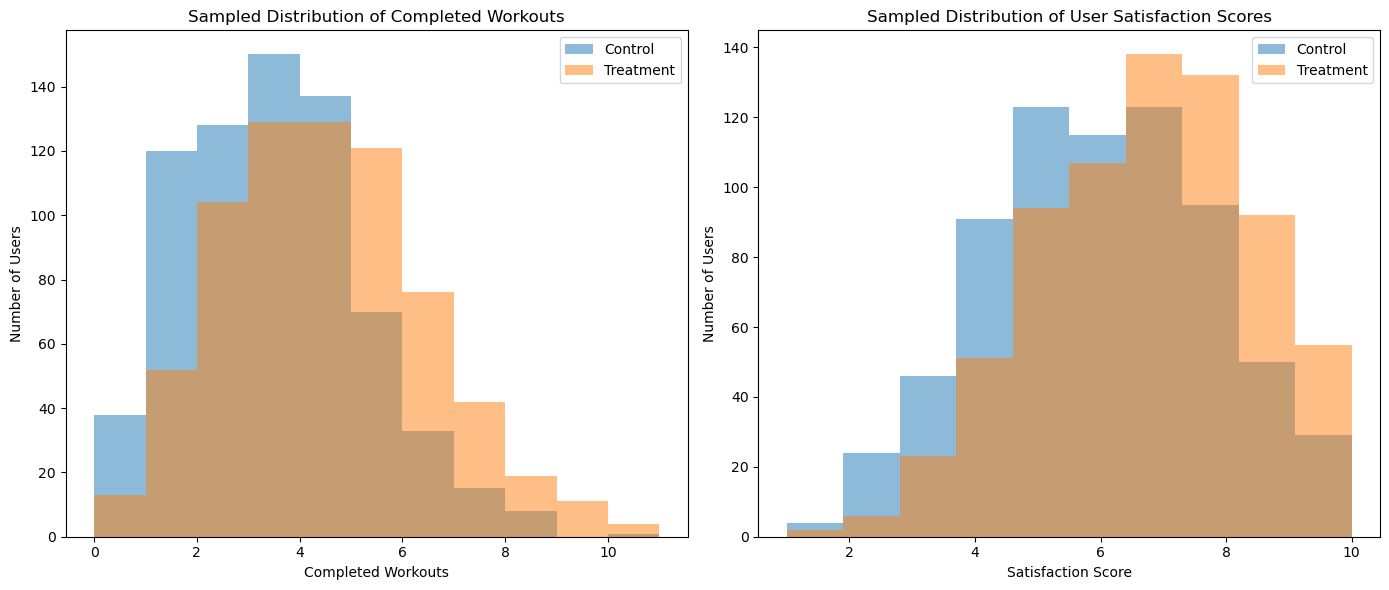

(3.0028571428571427, 4.0128571428571425, 5.9682902487074445, 6.706087907910957)

In [3]:
# Define the sample size
sample_size = 700

# Sample from the simulated data
sample_control_workouts = control_workouts.sample(n=sample_size)
sample_treatment_workouts = treatment_workouts.sample(n=sample_size)
sample_control_satisfaction = np.random.choice(control_satisfaction, sample_size)
sample_treatment_satisfaction = np.random.choice(treatment_satisfaction, sample_size)

# Plotting sampled data
plt.figure(figsize=(14, 6))

# Sampled completed workouts
plt.subplot(1, 2, 1)  # Completed workouts
plt.hist(sample_control_workouts['completed_workouts'], bins=range(12), alpha=0.5, label='Control')
plt.hist(sample_treatment_workouts['completed_workouts'], bins=range(12), alpha=0.5, label='Treatment')
plt.xlabel('Completed Workouts')
plt.ylabel('Number of Users')
plt.title('Sampled Distribution of Completed Workouts')
plt.legend()

# Sampled user satisfaction
plt.subplot(1, 2, 2)  # User satisfaction
plt.hist(sample_control_satisfaction, bins=10, alpha=0.5, label='Control', range=(1,10))
plt.hist(sample_treatment_satisfaction, bins=10, alpha=0.5, label='Treatment', range=(1,10))
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Users')
plt.title('Sampled Distribution of User Satisfaction Scores')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and print the averages for sampled data
sample_avg_control_workouts = sample_control_workouts['completed_workouts'].mean()
sample_avg_treatment_workouts = sample_treatment_workouts['completed_workouts'].mean()
sample_avg_control_satisfaction = np.mean(sample_control_satisfaction)
sample_avg_treatment_satisfaction = np.mean(sample_treatment_satisfaction)

(sample_avg_control_workouts, sample_avg_treatment_workouts, sample_avg_control_satisfaction, sample_avg_treatment_satisfaction)


In the sampled data for the A/B test on the Fitness and Wellness App:

The Control Group, receiving standard motivational messages, had an average of 3.00 completed workouts per week and an average user satisfaction score of 5.96 from the sample.

The Treatment Group, receiving enhanced, personalized motivational messages, had an average of 4.02 completed workouts per week and an average user satisfaction score of 6.79 from the sample.

The histograms show the sampled distributions of completed workouts and user satisfaction scores for both groups. As seen in the sampled data, the treatment group typically completes more workouts and reports higher satisfaction, consistent with the results from the full population data. This provides a basis for statistical analysis to test if the differences observed are statistically significant. ​

## AB Testing:

Assuming a significance level equal to 5% we do the tests:

## T-test for User Satisfaction Scores:

Null Hypothesis (H0): The new motivational messages do not increase the average user satisfaction score compared to the standard messages.

Alternative Hypothesis (Ha): The new motivational messages increase the average user satisfaction score compared to the standard messages.

Now, let's perform the one-tailed t-test based on this hypothesis:

In [4]:
t_statistic ,p_value = stats.ttest_ind(sample_treatment_satisfaction, sample_control_satisfaction,  equal_var=False,
                                       alternative='greater') 

print(f"T-statistic = {t_statistic:.3f}, one-tailed p-value = {p_value:.3f}")

T-statistic = 7.939, one-tailed p-value = 0.000


p-value < alpha so we reject the null hypothesis and there is a statistically significant difference between the two versions of the app and the treatment version works well.

## z-test for proportions

To apply a z-test for proportions to our scenario, we need to define a binary outcome from our continuous satisfaction scores. For example, we might consider a "High Satisfaction" outcome where users rate their satisfaction as 8 or higher.

We'll then compare the proportion of users reporting high satisfaction between the control and treatment groups. Here's how we can do that:

Define the binary outcome based on satisfaction scores (e.g., scores >= 8).
Count the number of users in each group (control and treatment) that meet the criterion for high satisfaction.
Use these counts and the sample sizes to perform the z-test for proportions.

Null Hypothesis (H0): The proportion of users who report high satisfaction (score ≥ 8) is the same for both the treatment and control groups.

Alternative Hypothesis (Ha): The proportion of users who report high satisfaction (score ≥ 8) is greater in the treatment group than in the control group.

In [5]:
# Define high satisfaction as a satisfaction score of 8 or above
high_satisfaction_control = (sample_control_satisfaction >= 8).sum()
high_satisfaction_treatment = (sample_treatment_satisfaction >= 8).sum()

# Total number of users in each sample
n_control = len(sample_control_satisfaction)
n_treatment = len(sample_treatment_satisfaction)

# Perform the one-tailed z-test for proportions
z_stat, p_val_proportion = proportions_ztest([high_satisfaction_treatment, high_satisfaction_control], [n_treatment, n_control]
                                             , alternative='larger')

# Print the results for the one-tailed z-test
print(f"One-Tailed Z-test for High Satisfaction Proportions: Z-statistic = {z_stat:.3f}, p-value = {p_val_proportion:.3f}")


One-Tailed Z-test for High Satisfaction Proportions: Z-statistic = 5.314, p-value = 0.000


p < alpha so we reject the null hypothesis. The proportion of users who report high satisfaction (score ≥ 8) is greater in the treatment group than in the control group.